# **Este *ipynb* está enmarcado dentro de un trabajo que busca predecir qué alumnos del departamento de Sistemas la UTN FRBA desertarán.**

Los datos disponibles fueron unificados en una sola tabla denominada **merged_df**.

En este **ipynb** se realizará un análisis estadístico del previamente mencionado dataset.

## **Aclaraciones**

Aquellas líneas de código identificadas con **" # "** fueron **extraídas** de la siguente **fuente**:
* https://github.com/sebajarem/Analisis_desercion_en_ingenieria/tree/master/desercion/diagnostics/00_datos_01


Aquellas líneas de código identificadas con **" ## "** son de **elaboración propia**.

---

## **Importación de librerías**

In [1]:
## Importamos librerías.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Google Colaboratory o Local**
El notebook podrá ser corrido tanto localmente como en Google Colaboratory.

El usuario deberá modificar el root path de acuerdo a su conveniencia.

In [2]:
## Verificamos si estamos corriendo el noteboock en Google Colaboratory.
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)

## En el caso de estar en Google Colab, montamos nuestro Drive.
if var_google_colab:
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  ## Direccion root donde está el notebook.
  root_path = "/content/gdrive/MyDrive/Colab Notebooks/GIAR/"

## En el caso de no estar en Google Colab, estamos corriendo localmente el notebook.
else:
  root_path = ""

True
Mounted at /content/gdrive


## **Datasets**

In [3]:
## Importamos el dataset Datos-Alumnos-SIGA.
baseline = pd.read_csv(root_path + 'datos/baseline_2009.csv')

## **ANÁLISIS DE LOS DATOS**

In [4]:
## Imprimimos las dimensiones del dataset.
print(f'Dimensiones del dataset: {baseline.shape}')

Dimensiones del dataset: (4558, 32)


In [5]:
## Imprimimos los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de no nulos presentes.
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4558 entries, 0 to 4557
Data columns (total 32 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Codigo Alumno                                          4558 non-null   int64  
 1   EsTecnico                                              3951 non-null   float64
 2   Distancia                                              4509 non-null   float64
 3   deserto                                                4558 non-null   int64  
 4   Ciclo Lectivo de Cursada                               4558 non-null   float64
 5   edad al ingreso                                        4558 non-null   float64
 6   Turno_Mañana                                           4558 non-null   float64
 7   Turno_Noche                                            4558 non-null   float64
 8   Turno_Tarde                                     

In [6]:
## Vemos la cantidad y % de NaN por columna.
total = baseline.isnull().sum().sort_values(ascending=False)
percent = round(baseline.isnull().sum()/baseline.isnull().count()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent [%]'])
missing_data

,Total,Percent [%]
EsTecnico,607,13.32
Distancia,49,1.08
noAprobado,0,0.00
Descripción de recursada regular_Recurso 1 Vez,0,0.00
Descripción de recursada regular_Recurso 2 Veces,0,0.00
Descripción de recursada regular_Recurso 3 Veces,0,0.00
Descripción de recursada regular_Recurso 4 Veces,0,0.00
Descripción de recursada regular_Recurso 5 Veces,0,0.00
Descripción de recursada regular_Recurso n Veces (>5),0,0.00
Codigo Alumno,0,0.00


In [7]:
## Identificamos cuántos de los registros tienen dos columnas con valores nulos.
baseline[baseline['EsTecnico'].isnull()]['Distancia'].isnull().value_counts()

False    585
True      22
Name: Distancia, dtype: int64

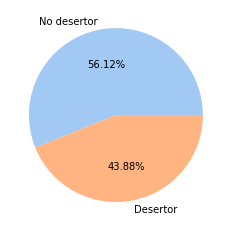

In [8]:
## Realizamos un gráfico de torta para mostrar la distribucion de los alumnos que desertan y los que no.
proporcion = pd.DataFrame(baseline.deserto.value_counts(normalize=True))
porcentaje = list(set(proporcion['deserto']))

colors = sns.color_palette('pastel')[0:5]
plt.pie(x = porcentaje, labels = ['No desertor','Desertor'], colors = colors, autopct = '%.2f%%')
plt.show()

In [9]:
## Diferenciamos las variables numéricas de las categóricas.
num_features = ('edad al ingreso', 'Distancia', 'Ciclo Lectivo de Cursada', 'Año', 'Cantidad de veces recursada regular','Descripción de recursada regular_No Recurso', 'Descripción de recursada regular_Recurso 1 Vez', 'Descripción de recursada regular_Recurso 2 Veces', 'Descripción de recursada regular_Recurso 3 Veces', 'Descripción de recursada regular_Recurso 4 Veces', 'Descripción de recursada regular_Recurso 5 Veces', 'Descripción de recursada regular_Recurso n Veces (>5)', 'noAprobado', 'Aprobado', 'Promociono', 'Nota', 'Nota_max_prom', 'Indice_aprobacion', 'Turno_Mañana', 'Turno_Noche', 'Turno_Tarde', 'Tipo de aprobación_Cambio Curso', 'Tipo de aprobación_Firmo', 'Tipo de aprobación_Libre', 'Tipo de aprobación_No Firmo', 'Tipo de aprobación_Promociono','cantidad de')
cat_features = ('EsTecnico', 'deserto', 'Sexo_F', 'Sexo_M')

In [10]:
## Obtenemos algunas estadísticas descriptivas de los datos disponibles.
baseline.loc[:, baseline.columns.isin(num_features)].describe().T

,count,mean,std,min,25%,50%,75%,max
Distancia,4509.0,44.121453,178.085244,0.866223,6.376963,6.376963,14.22176,2369.086326
Ciclo Lectivo de Cursada,4558.0,2013.258227,1.403706,2008.000000,2013.000000,2014.000000,2014.00000,2014.000000
edad al ingreso,4558.0,20.248135,3.495518,11.000000,18.000000,19.000000,20.00000,58.000000
Turno_Mañana,4558.0,10.351909,8.065912,0.000000,3.000000,9.000000,16.00000,42.000000
Turno_Noche,4558.0,7.709522,7.813430,0.000000,1.000000,5.000000,13.00000,45.000000
Turno_Tarde,4558.0,4.480035,4.174851,0.000000,1.000000,3.000000,7.00000,22.000000
Tipo de aprobación_Cambio Curso,4558.0,1.352567,2.410770,0.000000,0.000000,0.000000,1.00000,17.000000
Tipo de aprobación_Firmo,4558.0,9.834138,8.828811,0.000000,4.000000,7.000000,14.00000,40.000000
Tipo de aprobación_Libre,4558.0,3.485301,3.678682,0.000000,1.000000,2.000000,5.00000,32.000000
Tipo de aprobación_No Firmo,4558.0,6.045195,4.661664,0.000000,2.000000,5.000000,9.00000,34.000000


In [11]:
## Determinamos la cantidad de registros con 'edad al ingreso' menor a 17 años.
baseline[baseline['edad al ingreso']<17]['edad al ingreso'].value_counts()

16.0    1
13.0    1
12.0    1
11.0    1
Name: edad al ingreso, dtype: int64

In [12]:
## Vemos el porcentaje que reprecentan los registros con 'edad al ingreso' menor a 17 años respecto del total.
baseline[baseline['edad al ingreso']<17]['edad al ingreso'].count() / baseline['edad al ingreso'].count() * 100

0.08775778850372971

In [13]:
## Determinamos la cantidad de registros con 'distancia' respecto a la universidad mayor a 75 kilómetros.
baseline[baseline['Distancia']>75]['Distancia'].count()

240

In [14]:
## Vemos el porcentaje que reprecentan los registros con con 'distancia' respecto a la universidad mayor a 75 kilómetros respecto del total.
baseline[baseline['Distancia']>75]['Distancia'].count() / baseline['Distancia'].count() * 100

5.322687957418496

In [15]:
## Hay un registro con cantidad de años negativa.
baseline[baseline['cantidad de años']<0]

,Codigo Alumno,EsTecnico,Distancia,deserto,Ciclo Lectivo de Cursada,edad al ingreso,Turno_Mañana,Turno_Noche,Turno_Tarde,Tipo de aprobación_Cambio Curso,...,Descripción de recursada regular_Recurso 5 Veces,Descripción de recursada regular_Recurso n Veces (>5),noAprobado,Aprobado,Promociono,Nota,Año,Nota_max_prom,Indice_aprobacion,cantidad de años
4198,9995961,0.0,19.730227,0,2014.0,22.0,12.0,0.0,9.0,8.0,...,0.0,0.0,1.0,8.0,3.0,5.111111,2014.0,5.5,0.888889,-2.0


In [16]:
## Evidentemente, se trata de un error. Dado que este alumno cursó ya más de 10 materias, estimaremos que se encuentra en su 2do año y modificaremos el dato.
baseline.loc[baseline[baseline['cantidad de años']<0].index,'cantidad de años'] = 2

---

**Descartamos algunos registros**

In [17]:
## Elimino los registros con nulos.
df = baseline.dropna(how = 'any')

In [18]:
## Elimino los registros con distancia mayor a 75 km.
df.drop(df[df.Distancia > 75].index, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df.shape

(3763, 32)

---
**Elaboramos gráficos para visualizar la distribución de algunas variables en función de la clase (desertor o no desertor)**

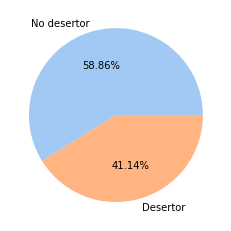

In [20]:
## Realizamos un gráfico de torta para mostrar la distribucion de los alumnos que desertan y los que no.
proporcion = pd.DataFrame(df.deserto.value_counts(normalize=True))
porcentaje = list(set(proporcion['deserto']))

colors = sns.color_palette('pastel')[0:5]
plt.pie(x = porcentaje, labels = ['No desertor','Desertor'], colors = colors, autopct = '%.2f%%')
plt.show()

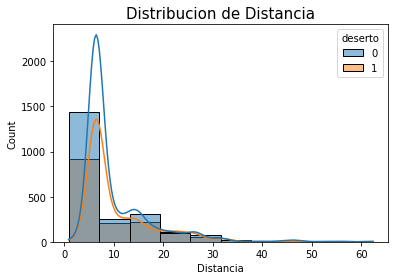

In [21]:
## Imprimimos la distribución de distancia a la que se encuentra el domicilio declarado del alumno en función de si son o no desertores.
sns.histplot(data=df,x=df['Distancia'],bins=10,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("Distancia")
plt.title('Distribucion de Distancia',size =15)
plt.show()

In [22]:
## Calculamos la media de la distancia en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['Distancia'].mean()

,deserto,Distancia
0,0,10.064469
1,1,10.672137


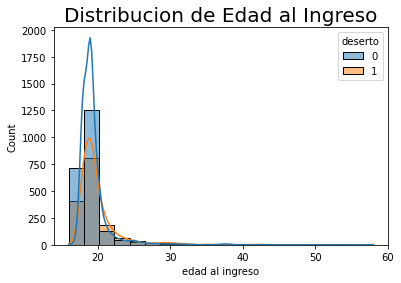

In [23]:
## Imprimimos la distribución de la edad de los alumnos al ingresar a la universidad en función de si son o no desertores.
sns.histplot(data=df,x=df['edad al ingreso'],bins=20,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("edad al ingreso")
plt.title('Distribucion de Edad al Ingreso',size = 20)
plt.show()

In [24]:
## Calculamos la media de la edad al ingreso en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['edad al ingreso'].mean()

,deserto,edad al ingreso
0,0,19.330023
1,1,19.884367


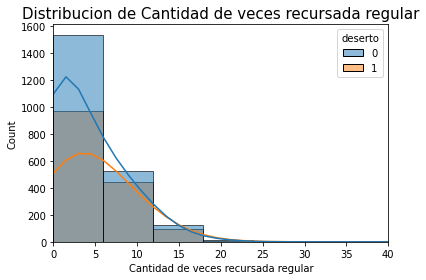

In [25]:
## Imprimimos la distribución de 'Cantidad de veces recursada regular' en función de si son o no desertores.
sns.histplot(data=df,x=df['Cantidad de veces recursada regular'],bins=50,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("Cantidad de veces recursada regular")
plt.title('Distribucion de Cantidad de veces recursada regular',size = 15)
plt.xlim(0,40)
plt.show()

In [26]:
## Calculamos la media de Cantidad de veces recursada regular en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['Cantidad de veces recursada regular'].mean()

,deserto,Cantidad de veces recursada regular
0,0,4.720542
1,1,6.674419


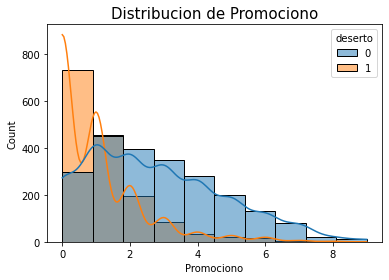

In [27]:
## Imprimimos la distribución de 'Promociono' en función de si son o no desertores.
sns.histplot(data=df,x=df['Promociono'],bins=10,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("Promociono")
plt.title('Distribucion de Promociono',size = 15)
plt.show()

In [28]:
## Calculamos la media de Promociono en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['Promociono'].mean()

,deserto,Promociono
0,0,2.718736
1,1,0.967700


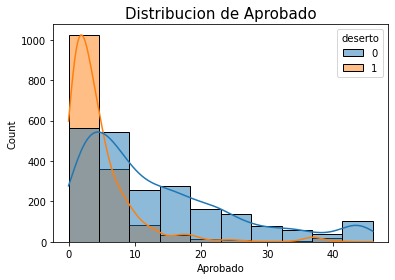

In [29]:
## Imprimimos la distribución de 'Aprobado' en función de si son o no desertores.
sns.histplot(data=df,x=df['Aprobado'],bins=10,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("Aprobado")
plt.title('Distribucion de Aprobado',size = 15)
plt.show()

In [30]:
## Calculamos la media de Aprobado en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['Aprobado'].mean()

,deserto,Aprobado
0,0,13.287585
1,1,4.651163


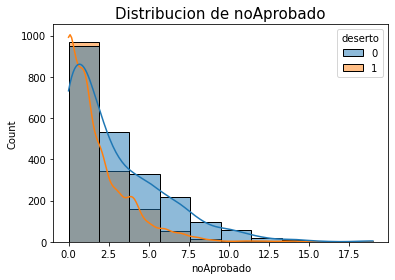

In [31]:
## Imprimimos la distribución de 'noAprobado' en función de si son o no desertores.
sns.histplot(data=df,x=df['noAprobado'],bins=10,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("noAprobado")
plt.title('Distribucion de noAprobado',size = 15)
plt.show()

In [32]:
## Calculamos la media de noAprobado en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['noAprobado'].mean()

,deserto,noAprobado
0,0,2.924605
1,1,1.591085


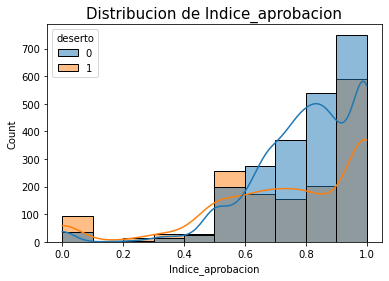

In [33]:
## Imprimimos la distribución de 'Indice_aprobacion' en función de si son o no desertores.
sns.histplot(data=df,x=df['Indice_aprobacion'],bins=10,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("Indice_aprobacion")
plt.title('Distribucion de Indice_aprobacion',size = 15)
plt.show()

In [34]:
## Calculamos la media de Indice_aprobacion en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['Indice_aprobacion'].mean()

,deserto,Indice_aprobacion
0,0,0.800397
1,1,0.743783


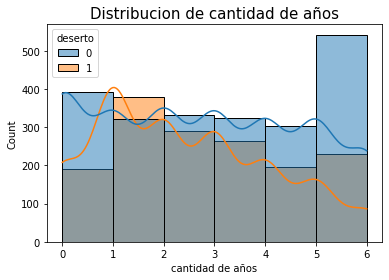

In [35]:
## Imprimimos la distribución de 'cantidad de años' en función de si son o no desertores.
sns.histplot(data=df,x=df['cantidad de años'],bins=6,kde=True,color=colors,stat='count',hue='deserto')
plt.xlabel("cantidad de años")
plt.title('Distribucion de cantidad de años',size = 15)
plt.show()

In [36]:
## Calculamos la media de cantidad de años en función del outcome de la variable 'deserto'.
df.groupby('deserto', as_index=False)['cantidad de años'].mean()

,deserto,cantidad de años
0,0,2.762980
1,1,2.427649


In [37]:
## Proporción de mujeres en el dataset.
baseline['Sexo_F'].value_counts(normalize = True)

0.0    0.864634
1.0    0.135366
Name: Sexo_F, dtype: float64

In [38]:
## Proporción desertores entre las mujeres.
baseline[baseline['Sexo_F'] == 1]['deserto'].value_counts(normalize = True)

0    0.606159
1    0.393841
Name: deserto, dtype: float64

In [39]:
## Proporción desertores entre los hombres.
baseline[baseline['Sexo_F'] == 0]['deserto'].value_counts(normalize = True)

0    0.554174
1    0.445826
Name: deserto, dtype: float64

---
---
---
---
---

In [40]:
## Creamos un dataset sin la variable a predecir y sin 'Código Alumno'.
x = df.loc[:, ~df.columns.isin(('Codigo Alumno','deserto'))].dropna(how='any')

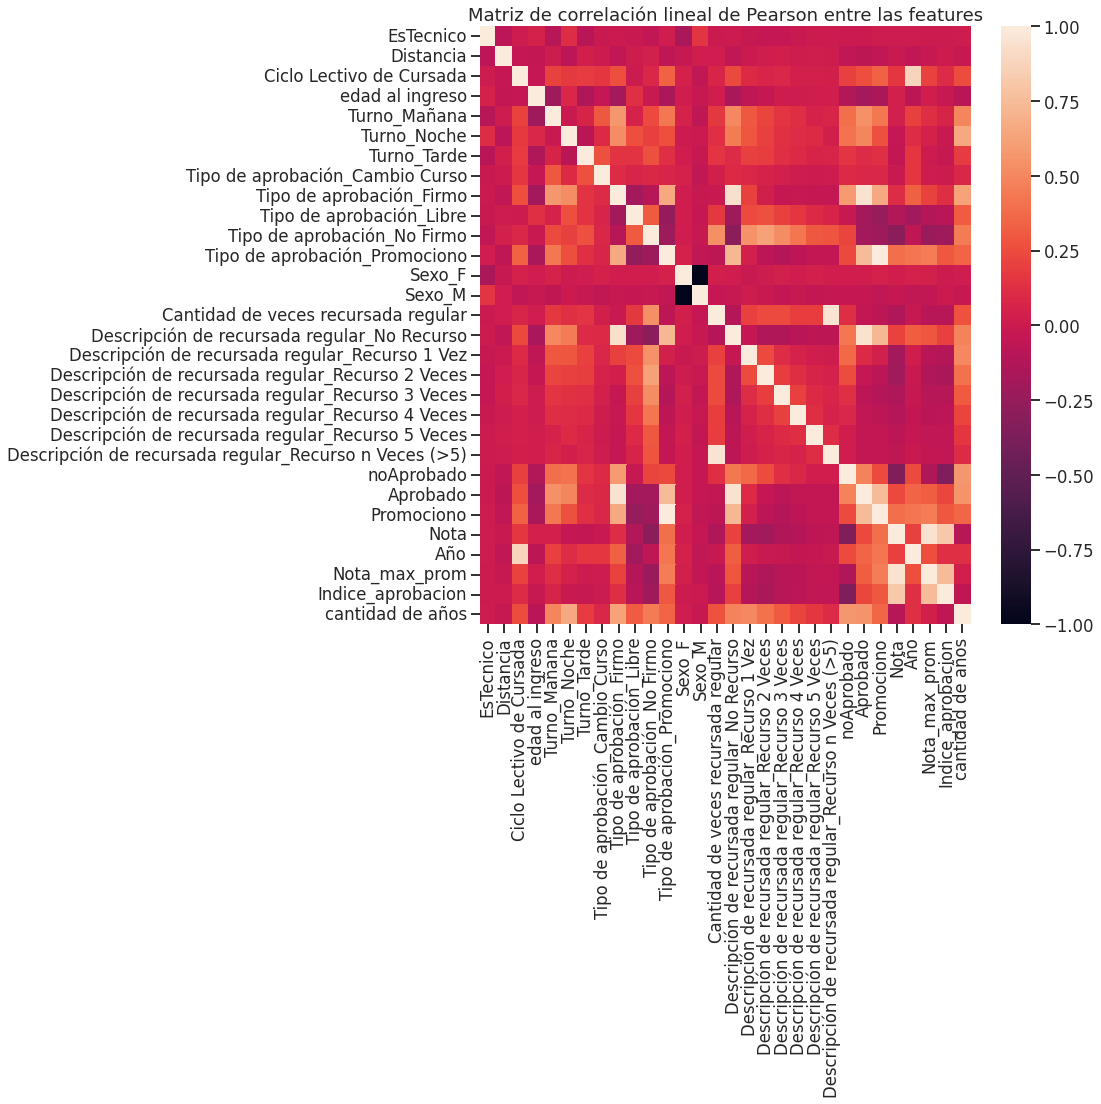

In [41]:
## Elaboramos e imprimimos la matriz de correlación lineal de Pearson entre las features.
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
plt.subplots(figsize=(11, 11))
sns.heatmap(np.corrcoef(x.T), xticklabels=x.columns, yticklabels=x.columns)
plt.title('Matriz de correlación lineal de Pearson entre las features')
plt.show()

##### **# Dataset Supervisado: Valores en función de la clase** ####

Como es un dataset supervisado, podría ser interesante ver los valores separados por clase. Por lo tanto, con el objeto solamente de realizar un análisis exploratorio, el dataset se divide según la clase y se realizan los estadísticos nuevamente.


In [42]:
## Dividimos el dataset.
desertores = df[df['deserto']==1]
no_desertores = df[df['deserto']==0]

In [43]:
## Vemos la cantidad y % de NaN por columna para los registros categorizados como 'desertores'.
total_nulos_desertores = desertores.isnull().sum().sort_values(ascending=False)
percent_nulos_desertores = round(desertores.isnull().sum()/desertores.isnull().count()*100,2).sort_values(ascending=False)
missing_data_desertores = pd.concat([total_nulos_desertores, percent_nulos_desertores], axis=1, keys=['Total', 'Percent [%]'])
missing_data_desertores

,Total,Percent [%]
Codigo Alumno,0,0.0
EsTecnico,0,0.0
Indice_aprobacion,0,0.0
Nota_max_prom,0,0.0
Año,0,0.0
Nota,0,0.0
Promociono,0,0.0
Aprobado,0,0.0
noAprobado,0,0.0
Descripción de recursada regular_Recurso n Veces (>5),0,0.0


In [44]:
## Vemos la cantidad y % de NaN por columna para los registros categorizados como 'NO desertores'.
total_nulos_no_desertores = no_desertores.isnull().sum().sort_values(ascending=False)
percent_nulos_no_desertores = round(no_desertores.isnull().sum()/no_desertores.isnull().count()*100,2).sort_values(ascending=False)
missing_data_no_desertores = pd.concat([total_nulos_no_desertores, percent_nulos_no_desertores], axis=1, keys=['Total', 'Percent [%]'])
missing_data_no_desertores

,Total,Percent [%]
Codigo Alumno,0,0.0
EsTecnico,0,0.0
Indice_aprobacion,0,0.0
Nota_max_prom,0,0.0
Año,0,0.0
Nota,0,0.0
Promociono,0,0.0
Aprobado,0,0.0
noAprobado,0,0.0
Descripción de recursada regular_Recurso n Veces (>5),0,0.0


In [45]:
## Obtenemos algunas estadísticas descriptivas de la clase desertores.
desertores.loc[:, baseline.columns.isin(num_features)].describe().T

,count,mean,std,min,25%,50%,75%,max
Distancia,1548.0,10.672137,7.353045,0.866223,6.376963,6.376963,13.816629,62.419142
Ciclo Lectivo de Cursada,1548.0,2012.430233,1.723158,2008.000000,2011.000000,2013.000000,2014.000000,2014.000000
edad al ingreso,1548.0,19.884367,2.921987,17.000000,18.000000,19.000000,20.000000,58.000000
Turno_Mañana,1548.0,9.032946,6.895626,0.000000,3.000000,8.000000,14.000000,35.000000
Turno_Noche,1548.0,6.828811,7.235070,0.000000,1.000000,5.000000,11.000000,36.000000
Turno_Tarde,1548.0,4.386951,3.990391,0.000000,1.000000,4.000000,7.000000,22.000000
Tipo de aprobación_Cambio Curso,1548.0,1.202842,2.363577,0.000000,0.000000,0.000000,1.000000,16.000000
Tipo de aprobación_Firmo,1548.0,6.153747,5.683611,0.000000,3.000000,4.000000,8.000000,40.000000
Tipo de aprobación_Libre,1548.0,4.720284,4.089961,0.000000,2.000000,4.000000,7.000000,32.000000
Tipo de aprobación_No Firmo,1548.0,7.218346,4.480093,0.000000,4.000000,7.000000,10.000000,27.000000


In [46]:
## Obtenemos algunas estadísticas descriptivas de la clase NO desertores.
no_desertores.loc[:, baseline.columns.isin(num_features)].describe().T

,count,mean,std,min,25%,50%,75%,max
Distancia,2215.0,10.064469,7.213531,0.866223,6.376963,6.376963,11.616999,62.419142
Ciclo Lectivo de Cursada,2215.0,2013.951242,0.288858,2009.000000,2014.000000,2014.000000,2014.000000,2014.000000
edad al ingreso,2215.0,19.330023,2.159175,16.000000,18.000000,19.000000,19.000000,42.000000
Turno_Mañana,2215.0,12.629345,8.363379,0.000000,7.000000,12.000000,19.000000,42.000000
Turno_Noche,2215.0,8.048307,8.228221,0.000000,1.000000,6.000000,14.000000,45.000000
Turno_Tarde,2215.0,5.176975,4.279456,0.000000,1.000000,4.000000,8.000000,21.000000
Tipo de aprobación_Cambio Curso,2215.0,1.646050,2.591113,0.000000,0.000000,1.000000,2.000000,17.000000
Tipo de aprobación_Firmo,2215.0,13.357562,9.604999,0.000000,5.000000,11.000000,19.000000,40.000000
Tipo de aprobación_Libre,2215.0,2.492551,2.944659,0.000000,0.000000,2.000000,4.000000,22.000000
Tipo de aprobación_No Firmo,2215.0,5.659594,4.703750,0.000000,2.000000,5.000000,8.000000,34.000000


---

---

## **Observaciones extraídas de la abajo mencionada fuente:**

* El dataset se encuentra balanceado. **43.88%** de los alumnos del dataset desertó mientras que el **56.12%** sigue en carrera.

* La variable **EsTecnico** tiene un **13.32%** de datos nulos. Dependiendo el método que se use podrá tolerarse o no. En los casos que no se pueda tolerar, se tendrá que imputar algún valor o se podrá optar por descartar la variable.

* El valor mínimo de la variable **edad_al_ingreso** es 11. Un valor muy bajo y puede tratarse de un error. Se analizaron la cantidad de casos que existen en que esta variable tiene un valor menor a 17, que es la mínima edad que podría entrar un estudiante a la universidad respetando todos los ciclos lectivos sin adelantar ninguno de las etapas de estudio anteriores, y dicho valor es de 4 observaciones. Las cuales representan una cantidad insignificante respecto del total de observaciones 4558 (0.08%). Por lo tanto al no poder verificarlo por el momento se decide dejarlo.


### **FUENTE:** 
* https://github.com/sebajarem/Analisis_desercion_en_ingenieria/tree/master/desercion/diagnostics/00_datos_01  (**GIAR 2021** - Romero, G., et al. Predictor de deserción universitaria)
---

---
## **Observaciones a partir del presente trabajo:**


* La variable **Distancia** tiene un **1.08%** de datos nulos.

* El valor máximo de la variable **Distancia** es **2369.08** km. Un valor muy alto. Son 240 los registros que **exceden los 75 km**. Estos representan un **5.32%** respecto del total de observaciones (4558).

* Dado que se cree poco problable que un alumno viva a **más de 75 km** lineales de la universidad y se desplace a ella cotidianamente (durante el período analizado no habían cursadas virtuales), se considera que esos datos **no** están actualizados y por ello serán desestimados.

* Hay un registro con **cantidad de años** negativa. Evidentemente, se trata de un error. Dado que ese alumno cursó ya más de 10 materias, estimaremos que se encuentra en su 2do año y modificaremos el dato.

* Luego de remover los registros que tenían valores nulos, podemos afirmar que el dataset sigue balanceado. **41.14%** de los alumnos del dataset desertó, mientras que el **58.86%** sigue en carrera.


* El porcentaje de desertores entre los alumnos de **sexo masculino** es del **44.58%**, mientras que entre los de **sexo femenino** dicho porcentaje desciende al **39.38%**.

---

---

In [47]:
## Guardamos el dataframe en un csv.
df.to_csv(root_path + 'datos/base de datos estudiantes.csv',index=False)